### NB: a five fold perfomed worse compared to 10 Kfold

## Data 

In [106]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
pd.set_option('display.max_column', None)

In [46]:
%%time
def data_loader():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    sub = pd.read_csv('SampleSubmission.csv')
    policy = pd.read_csv('policies.csv')
    data_dict = pd.read_csv('DataDictionary.csv')
    return train,test, sub, policy, data_dict

Wall time: 23 ms
Parser   : 205 ms


In [47]:
%%time
train,test, sub, policy, data_dict = data_loader()

Wall time: 7.54 s


In [48]:
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [49]:
test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [50]:
sub.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,0
1,ID_GTE9ZUJ9GZ97,0
2,ID_RUVIYRKWZ4RG,0
3,ID_J81X8SWU6JYN,0
4,ID_94NM3JJAWWOQ,0


In [51]:
train.shape

(9376, 15)

In [52]:
test.shape

(4019, 14)

In [53]:
sub.shape

(4019, 2)

In [54]:
policy.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [55]:
policy.shape

(30371, 10)

In [56]:
data_dict.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
Policy Data,Columns,policy number,product code,trans date,from date,to date,agency full name,class of business,client type,Renewal frequency,branch,NaN,NaN,NaN,Claims Data,Claim Number,Policy Number,Loss Date,Sum Insured,Paid to Date,Agent,risk type,class of business,product,client type,Renewal frequency,primary cause,secondary cause,branch
Unnamed: 1,Data type,Unique policy identifier,product code,date of policy transaction,first date of policy cover,last date of policy cover,agency,class of business,client type,policy renewal frequency,branch,NaN,NaN,NaN,NaN,Description,Unique policy identifier,Date of loss event,Sum Insured,Total cost of claim.,Agency (categorical variable),Risk Type,Class of business,Product,Client Type,Policy renewal frequency,Primary cause of loss event,Secondary cause of loss event,branch


In [57]:
same_col = [i for i in train.columns.tolist() if i in policy.columns.to_list()]

In [58]:
np.array(policy.columns.to_list())

array(['policy_number', 'product_code', 'trans_date', 'from_date',
       'to_date', 'agent', 'class_of_business', 'client_type',
       'renewal_frequency', 'branch'], dtype='<U17')

In [229]:
df = pd.concat([train, test]).reset_index(drop=True)

In [230]:
ntrain = train.shape[0]

In [231]:
df['risk_business'] = df['class_of_business'] + '_' + df['risk_type']
df['product_agent'] = df['agent'] + '_' + df['product']
df['renwal_business'] = df['renewal_frequency'] + '_' + df['class_of_business']
df['product_class'] = df['class_of_business'] + '_' + df['product']

In [237]:
df['year'] = [int(i.split('-')[0]) - 2018 for i in df.loss_date]

In [238]:
df['cause'] = df['secondary_cause'] + '_' + df['primary_cause']

In [239]:
df['product_class'] = df['class_of_business'] + '_' + df['product']

In [240]:
id_claim = [i.split('m')[-1] for i in df['claim_number']]
df['id_claim'] = id_claim
df['idclaim_freq'] = df['id_claim'].map(df['id_claim'].value_counts())
df = df.drop('id_claim', axis = 1)

In [241]:
df['loss_date'] = pd.to_datetime(df['loss_date'], format='%Y-%m-%d')

In [242]:
for attr in ['day', 'month', 'week', 'dayofweek', 'weekofyear', 'days_in_month', 'is_month_start', 'is_month_end', 'dayofyear']:
    df[attr] = getattr(df['loss_date'].dt, attr)
df['is_weekend'] = (df['dayofweek'] >= 5)*1
df['fortnight'] = df['day']%15
df['which_fortnight'] = df['day']//15

C:\Users\Hp\AppData\Local\Temp/ipykernel_49288/360260820.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[attr] = getattr(df['loss_date'].dt, attr)


In [243]:
df['branch_product'] = pd.Series(df.branch + '_' + df['product'])

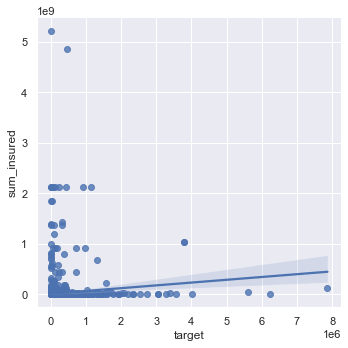

In [244]:
sns.set_theme(color_codes=True)
sns.lmplot(x="target", y="sum_insured", data=train);

In [281]:
#df = df.drop(['claim_id', 'loss_date'], axis = 1)
df = df.fillna(-999999)

In [284]:
#cat_feat = [val for index, val in enumerate(features) if index in cat_feat[0]]

In [285]:
new_test = df[train.shape[0]:].reset_index().drop('target', axis = 1)
new_train = df[:train.shape[0]]

In [286]:
features = [feat for feat in list(new_train) if feat != 'target' ]
cat_feat = np.where(new_train[features].dtypes != float)[0]

In [287]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [288]:
fold = model_selection.KFold(n_splits=10)

In [308]:
params = {'cat_features':cat_feat,
         'eval_metric': 'RMSE',
          'iterations':1000,
         'verbose': 10,
         'od_type':'Iter',
         'random_state':200}

In [309]:
from catboost import CatBoostRegressor

In [310]:
cat_model = CatBoostRegressor(**params)

In [311]:
def metric(y_val, pred):
    return sqrt(metrics.mean_squared_error(y_val, pred))

In [312]:
from sklearn import metrics

In [313]:
%%time
def modelling_tree(algorithm,yy,X, test_df):
    cv_score=[]
    test_pred=[]
    train_score=[]
    
    for train_index, test_index in fold.split(X,pd.Series(yy)):
        
        X_trainx, X_val = X.iloc[train_index], X.iloc[test_index]
        y_trainx, y_val = pd.Series(yy).iloc[train_index], pd.Series(yy).iloc[test_index]

        algorithm.fit(X_trainx,y_trainx, eval_set=[(X_trainx,y_trainx),(X_val, y_val)], use_best_model = True)
        
        train_preds=algorithm.predict(X_trainx)
        train_score.append(metric(y_trainx, train_preds))
        
        val_preds=algorithm.predict(X_val)
        cv_score.append(metric(y_val, val_preds))

        test_p = algorithm.predict(test_df)
        test_pred.append(test_p)


    print(f'Training Accuracy Score {np.mean(train_score)}')
    print(f'Validation Accuracy Score {np.mean(cv_score)}')
    
    return test_pred

Wall time: 0 ns
Parser   : 237 ms


In [314]:
new_train

,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,risk_business,product_agent,renwal_business,product_class,cause,year,idclaim_freq,day,month,week,dayofweek,weekofyear,days_in_month,is_month_start,is_month_end,dayofyear,is_weekend,fortnight,which_fortnight,branch_product
0,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,ct0003,rf0001,pc0007,sc00022,br00006,82150.00,cob00031_rt00006,ag00068_prod00027,rf0001_cob00031,cob00031_prod00027,sc00022_pc0007,3,1,13,5,19,3,19,31,False,False,133,0,13,0,br00006_prod00027
1,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,ct0003,rf0001,pc0007,sc00023,br00002,3780.24,cob00010_rt00032,ag00226_prod00005,rf0001_cob00010,cob00010_prod00005,sc00023_pc0007,0,2,13,5,19,6,19,31,False,False,133,1,13,0,br00002_prod00005
2,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,ct0003,rf0001,pc0007,sc00024,br00002,2196.50,cob00010_rt00026,ag00037_prod00029,rf0001_cob00010,cob00010_prod00029,sc00024_pc0007,0,1,18,8,33,5,33,31,False,False,230,1,3,1,br00002_prod00029
3,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,ct0003,rf0001,pc0007,sc00021,br00001,105.67,cob00009_rt00032,ag00037_prod00005,rf0001_cob00009,cob00009_prod00005,sc00021_pc0007,0,1,20,12,51,3,51,31,False,False,354,0,5,1,br00001_prod00005
4,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,ct0001,rf0001,pc0007,sc00021,br00001,1605.64,cob00034_rt00023,ag00226_prod00015,rf0001_cob00034,cob00034_prod00015,sc00021_pc0007,0,1,7,11,45,2,45,30,False,False,311,0,7,0,br00001_prod00015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,pol000006054,claim0003743,42000.0,prod00015,ag00037,cob00034,rt00023,ct0001,rf0002,pc0007,sc00021,br00002,205.68,cob00034_rt00023,ag00037_prod00015,rf0002_cob00034,cob00034_prod00015,sc00021_pc0007,1,1,2,9,36,0,36,30,False,False,245,0,2,0,br00002_prod00015
9372,pol000006715,claim0005088,6800.0,prod00005,ag00064,cob00009,rt00032,ct0003,rf0002,pc0007,sc00021,br00002,1133.32,cob00009_rt00032,ag00064_prod00005,rf0002_cob00009,cob00009_prod00005,sc00021_pc0007,0,1,12,5,19,5,19,31,False,False,132,1,12,0,br00002_prod00005
9373,pol000008236,claim0008976,5000.0,prod00005,ag00064,cob00009,rt00032,ct0003,rf0001,pc0007,sc00029,br00001,2176.00,cob00009_rt00032,ag00064_prod00005,rf0001_cob00009,cob00009_prod00005,sc00029_pc0007,0,1,28,7,30,5,30,31,False,False,209,1,13,1,br00001_prod00005
9374,pol000006847,claim0005250,6000.0,prod00005,ag00037,cob00009,rt00032,ct0003,rf0001,pc0007,sc00022,br00002,851.40,cob00009_rt00032,ag00037_prod00005,rf0001_cob00009,cob00009_prod00005,sc00022_pc0007,0,1,16,8,33,3,33,31,False,False,228,0,1,1,br00002_prod00005


In [315]:
XX = new_train.drop('target', axis = 1)

In [316]:
test_x= new_test[XX.columns.to_list()]

In [317]:
%%time
test_pred = modelling_tree(algorithm = cat_model, yy = train.target, X = XX, test_df = test_x)

Learning rate set to 0.071173
0:	learn: 208010.3431873	test: 208013.4274350	test1: 191006.0375941	best: 191006.0375941 (0)	total: 660ms	remaining: 10m 59s
10:	learn: 196268.6849152	test: 195713.8941399	test1: 178232.0847513	best: 178232.0847513 (10)	total: 5.45s	remaining: 8m 9s
20:	learn: 190849.0628074	test: 191740.2842668	test1: 174438.6824107	best: 174438.6824107 (20)	total: 10.1s	remaining: 7m 48s
30:	learn: 188726.0078980	test: 189790.3689551	test1: 173148.8448212	best: 173148.8448212 (30)	total: 14s	remaining: 7m 17s
40:	learn: 186738.2831822	test: 188312.7397940	test1: 172722.9028093	best: 172694.2717914 (39)	total: 18.5s	remaining: 7m 13s
50:	learn: 184887.0023609	test: 187192.2216915	test1: 172054.9453130	best: 172026.2210606 (49)	total: 22.6s	remaining: 7m 1s
60:	learn: 184156.0035789	test: 186496.9811932	test1: 171928.3189934	best: 171907.4036751 (58)	total: 27.3s	remaining: 7m
70:	learn: 181800.1401339	test: 185218.4998653	test1: 171953.5905289	best: 171870.3147040 (64)	to

20:	learn: 191374.9091840	test: 196879.8492860	test1: 107385.0476600	best: 107385.0476600 (20)	total: 3.77s	remaining: 2m 56s
30:	learn: 186561.3363040	test: 194023.2373397	test1: 105582.5475821	best: 105394.3144030 (29)	total: 5.65s	remaining: 2m 56s
40:	learn: 182918.7947918	test: 191445.9370822	test1: 104731.8209318	best: 104728.3263930 (39)	total: 7.46s	remaining: 2m 54s
50:	learn: 178055.2777564	test: 188808.6937286	test1: 103464.4853158	best: 103464.4853158 (50)	total: 9.16s	remaining: 2m 50s
60:	learn: 174214.5604521	test: 186704.6445673	test1: 102554.2540492	best: 102471.9136559 (59)	total: 11s	remaining: 2m 49s
70:	learn: 171335.9014353	test: 185756.6035439	test1: 101444.4086379	best: 101444.4086379 (70)	total: 12.7s	remaining: 2m 46s
80:	learn: 168789.8526125	test: 183746.4604411	test1: 100807.9109380	best: 100807.9109380 (80)	total: 14.6s	remaining: 2m 45s
90:	learn: 166398.9964185	test: 183210.8607101	test1: 100542.0898691	best: 100506.9459183 (88)	total: 16.2s	remaining: 2

80:	learn: 155369.2958075	test: 164425.5150416	test1: 292098.7612614	best: 292014.2116535 (74)	total: 14.3s	remaining: 2m 42s
90:	learn: 153647.7694290	test: 163173.7444899	test1: 291897.0368034	best: 291897.0368034 (90)	total: 16.4s	remaining: 2m 44s
100:	learn: 151582.3091861	test: 160960.8637133	test1: 291824.5344254	best: 291824.5344254 (100)	total: 18s	remaining: 2m 40s
110:	learn: 150227.6349926	test: 160704.1969604	test1: 291622.4712915	best: 291622.4712915 (110)	total: 19.6s	remaining: 2m 37s
120:	learn: 148868.2668378	test: 159790.5806897	test1: 291169.3951407	best: 291121.5461529 (115)	total: 21.5s	remaining: 2m 35s
130:	learn: 148158.3058911	test: 159555.0795605	test1: 291110.1397050	best: 291110.1397050 (130)	total: 23.2s	remaining: 2m 33s
140:	learn: 147397.7671323	test: 159460.7141411	test1: 291114.5081620	best: 291082.7199384 (137)	total: 25.2s	remaining: 2m 33s
150:	learn: 146534.8590335	test: 158777.8428797	test1: 291042.6262342	best: 291042.6262342 (150)	total: 27s	re

In [319]:
cat_sub = np.mean(test_pred, axis = 0)
sub['target'] = cat_sub
sub['target'].describe()

sub.to_csv('1000est_base_cat.csv', index = False)

In [334]:
feat_imp = pd.DataFrame({'Feature': cat_model.feature_names_, 'Score': cat_model.feature_importances_})
feat_imp = feat_imp.sort_values(by = 'Score', ascending = False)

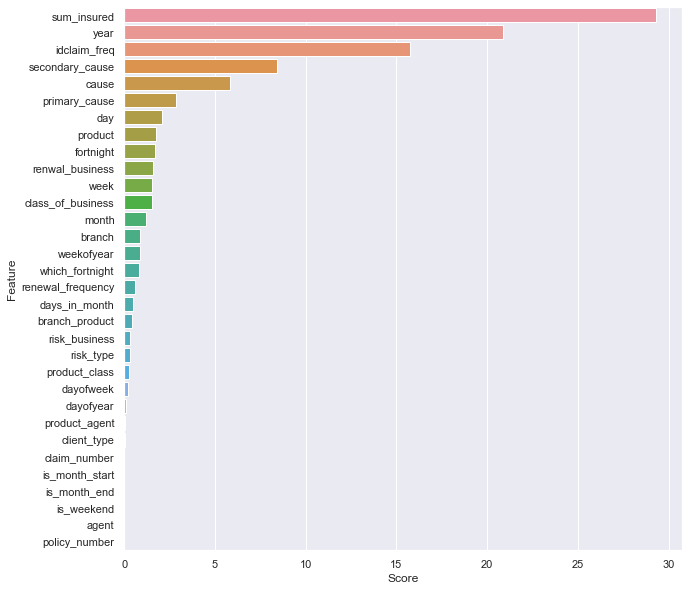

In [335]:
plt.figure(figsize = (10,10))
sns.barplot(y = 'Feature', x = 'Score', data = feat_imp);

In [ ]:
[feat_imp['Score'][i] for i in range(feat_imp.shape[0])]

In [347]:
feat_to_use = [feat_imp['Feature'][i] for i in range(feat_imp.shape[0]) if feat_imp['Score'][i] > 0]

In [349]:
print(feat_to_use)

['sum_insured', 'product', 'class_of_business', 'risk_type', 'client_type', 'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch', 'risk_business', 'product_agent', 'renwal_business', 'product_class', 'cause', 'year', 'idclaim_freq', 'day', 'month', 'week', 'dayofweek', 'weekofyear', 'days_in_month', 'dayofyear', 'fortnight', 'which_fortnight', 'branch_product']


In [307]:


"""
This Submission was 

params = {'cat_features':cat_feat,
         'eval_metric': 'RMSE',
          'iterations':3000,
         'verbose': 100,
         'od_type':'Iter',
         'random_state':200}
"""


cat_sub = np.mean(test_pred, axis = 0)
sub['target'] = cat_sub
sub['target'].describe()

sub.to_csv('aws_base_cat.csv', index = False)